In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
trip_df = pd.read_csv('~/data/trip.csv')

In [3]:
trip_df.info() # fare_amount 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [4]:
trip_df.describe() # passenger_count max 값? trip_distance 0? fare_amount의 마이너스 값? 최대값? tolls_amount max 값?

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [5]:
trip_df.head(10)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.0
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.5,9.86,0.0
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.0,1.78,0.0
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.0,0.00,0.0
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.0,2.75,0.0


In [6]:
trip_df.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


In [7]:
# 결측치 파악
trip_df.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [8]:
trip_df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [9]:
trip_df[trip_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [10]:
fare_isna_index = trip_df[trip_df['fare_amount'].isna()].index

In [11]:
trip_df[(trip_df['trip_distance'] >= 15) & (trip_df['trip_distance']<16)] 
# distance와 fare에 중간값을 넣어볼까?
# 챗Gpt 확인

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
157,David Brooks,12/11/2017 10:21:18 AM,12/11/2017 11:14:57 AM,Debit Card,1,15.60,51.5,11.60,5.76
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.00,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.00,5.76
251,Melissa Gates,11/14/2017 7:32:28 AM,11/14/2017 8:22:59 AM,Cash,1,15.48,45.0,8.00,5.76
434,Zachary Torres,10/27/2017 5:53:28 AM,10/27/2017 6:20:01 AM,Cash,1,15.00,41.5,0.00,0.00
1247,Eric Patel,11/03/2017 8:26:48 AM,11/03/2017 9:13:35 AM,Cash,1,15.30,44.5,7.00,5.76
1392,Amy Glenn,11/14/2017 5:29:23 PM,11/14/2017 6:38:25 PM,Cash,1,15.20,52.0,0.00,0.00
2519,Stephanie Jackson,07/08/2017 3:23:07 PM,07/08/2017 4:07:56 PM,Debit Card,1,15.85,45.5,11.58,0.00
4347,Jennifer Coleman,08/28/2017 10:14:04 AM,08/28/2017 10:48:13 AM,Cash,3,15.62,44.5,0.00,0.00
4360,Rebekah Shaffer DDS,12/10/2017 1:35:26 PM,12/10/2017 2:02:44 PM,Debit Card,2,15.60,43.0,5.00,5.76


In [12]:
trip_distance_fifteen=trip_df[(trip_df['trip_distance'] >= 15) & (trip_df['trip_distance']<16)]

In [13]:
trip_distance_fifteen['fare_amount'].mean()

48.26923076923077

In [14]:
trip_df[trip_df['trip_distance'] == 2.2]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.2,NaN,0.00,0.0
192,Dylan Meyer,10/05/2017 6:49:25 PM,10/05/2017 7:01:35 PM,Debit Card,2,2.2,10.5,1.60,0.0
431,Dr. Michael Combs,05/25/2017 4:34:53 PM,05/25/2017 5:03:26 PM,Debit Card,1,2.2,17.0,5.60,0.0
495,Melissa Brown,12/19/2017 8:46:45 PM,12/19/2017 8:57:10 PM,Cash,1,2.2,10.0,1.70,0.0
559,Anna Schwartz,05/01/2017 5:38:23 PM,05/01/2017 5:52:12 PM,Cash,1,2.2,10.5,2.45,0.0
...,...,...,...,...,...,...,...,...,...
22392,Clinton Shaw,02/04/2017 2:11:46 AM,02/04/2017 2:23:22 AM,Credit Card,1,2.2,10.0,0.00,0.0
22420,Thomas Davenport,08/14/2017 4:43:26 PM,08/14/2017 4:54:12 PM,Credit Card,1,2.2,10.0,2.35,0.0
22465,Vicki Murray,04/16/2017 9:17:00 PM,04/16/2017 9:29:31 PM,Cash,1,2.2,10.5,2.00,0.0
22649,Dawn York,11/15/2017 10:23:47 PM,11/15/2017 10:37:09 PM,Credit Card,1,2.2,10.5,0.00,0.0


In [15]:
trip_distance_two=trip_df[trip_df['trip_distance'] == 2.2]

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

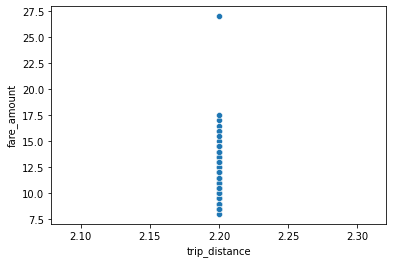

In [16]:
sns.scatterplot(x = trip_distance_two['trip_distance'], y = trip_distance_two['fare_amount'])

In [17]:
trip_distance_two.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,188.000000,1.880000e+02,187.000000,188.000000,188.0
mean,1.372340,2.200000e+00,11.256684,1.415798,0.0
std,1.013112,4.452750e-16,2.198092,1.297429,0.0
min,0.000000,2.200000e+00,8.000000,0.000000,0.0
25%,1.000000,2.200000e+00,10.000000,0.000000,0.0
50%,1.000000,2.200000e+00,10.500000,1.465000,0.0
75%,1.000000,2.200000e+00,12.250000,2.450000,0.0
max,6.000000,2.200000e+00,27.000000,5.600000,0.0


In [18]:
trip_distance_two.median()

/tmp/ipykernel_123/3822718748.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trip_distance_two.median()


passenger_count     1.000
trip_distance       2.200
fare_amount        10.500
tip_amount          1.465
tolls_amount        0.000
dtype: float64

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

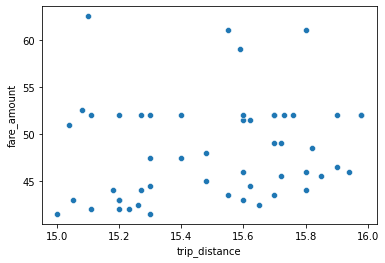

In [19]:
sns.scatterplot(x = trip_distance_fifteen['trip_distance'], y = trip_distance_fifteen['fare_amount'])

In [20]:
trip_distance_fifteen.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,54.000000,54.000000,52.000000,54.000000,54.000000
mean,1.574074,15.500556,48.269231,6.784074,2.702222
std,1.191192,0.287385,5.298410,5.013154,3.138154
min,1.000000,15.000000,41.500000,0.000000,0.000000
25%,1.000000,15.237500,43.875000,0.000000,0.000000
50%,1.000000,15.570000,47.500000,8.325000,0.000000
75%,2.000000,15.720000,52.000000,11.010000,5.760000
max,6.000000,15.980000,62.500000,18.050000,10.500000


In [21]:
trip_distance_fifteen.median()

/tmp/ipykernel_123/1478744059.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trip_distance_fifteen.median()


passenger_count     1.000
trip_distance      15.570
fare_amount        47.500
tip_amount          8.325
tolls_amount        0.000
dtype: float64

In [22]:
fare_isna_index

Int64Index([52, 189, 244], dtype='int64')

In [23]:
# 각 구간의 중앙값을 넣자.
trip_df.loc[52,'fare_amount']=trip_distance_two['fare_amount'].median()

In [24]:
trip_df.loc[[189,244],'fare_amount']= trip_distance_fifteen['fare_amount'].median()

In [25]:
trip_df.loc[fare_isna_index]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,10.5,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,47.5,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,47.5,10.0,5.76


In [26]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22701 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


<AxesSubplot:ylabel='passenger_count'>

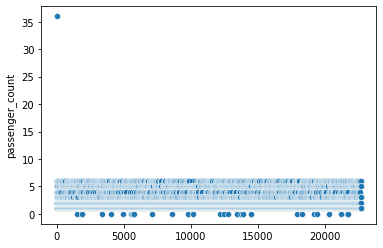

In [27]:
# 이상치 파악 passenger_count
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

In [28]:
trip_df['passenger_count'].sort_values(ascending = False)

64       36
17915     6
17804     6
17805     6
6835      6
         ..
13923     0
3354      0
4062      0
21640     0
19458     0
Name: passenger_count, Length: 22701, dtype: int64

In [29]:
trip_df.loc[[64]] # 잘못 적은 것 같음

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [30]:
trip_df = trip_df[trip_df['passenger_count'] != 36]

In [31]:
trip_df[trip_df['passenger_count']==0] # passanger가 0이라는 것이 말이 되나?

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [32]:
trip_df['passenger_count'].unique()

array([6, 1, 2, 4, 5, 3, 0])

In [33]:
trip_df['passenger_count'].value_counts(normalize=True) # 0의 비율이 1%도 안되니 삭제

1    0.710088
2    0.145595
5    0.050352
3    0.041982
6    0.030485
4    0.020044
0    0.001454
Name: passenger_count, dtype: float64

In [34]:
trip_df = trip_df[trip_df['passenger_count']!=0]

<AxesSubplot:ylabel='trip_distance'>

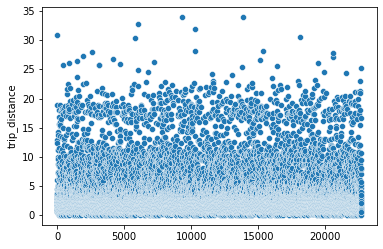

In [35]:
# 이상치 파악 trip_distance
sns.scatterplot(x = trip_df.index, y = trip_df['trip_distance'])

In [36]:
# 거리가 0?
trip_df['trip_distance'].sort_values()

6880      0.00
21622     0.00
4889      0.00
2819      0.00
10581     0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22667, dtype: float64

In [37]:
trip_df[trip_df['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [38]:
trip_df['trip_distance'].nunique()

1545

In [39]:
trip_df['trip_distance'].value_counts(normalize=True).get(0) # 우선 나중에 탑승/하차 시간 파악해서 처리해볼까?

0.006485198747077249

In [65]:
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])

In [66]:
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [67]:
trip_df['ride_duration'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']

In [68]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22667 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22667 non-null  object         
 1   tpep_pickup_datetime   22667 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22667 non-null  datetime64[ns] 
 3   payment_method         22667 non-null  object         
 4   passenger_count        22667 non-null  int64          
 5   trip_distance          22667 non-null  float64        
 6   fare_amount            22667 non-null  float64        
 7   tip_amount             22667 non-null  float64        
 8   tolls_amount           22667 non-null  float64        
 9   ride_duration          22667 non-null  timedelta64[ns]
 10  ride_minutes           22667 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.6+ MB


In [72]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,0 days 00:07:12,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,0 days 00:30:15,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,0 days 00:16:43,16.716667


In [70]:
trip_df['ride_minutes'] = trip_df['ride_duration'].dt.total_seconds() / 60

In [71]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,0 days 00:07:12,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,0 days 00:30:15,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,0 days 00:16:43,16.716667


<AxesSubplot:xlabel='trip_distance', ylabel='ride_minutes'>

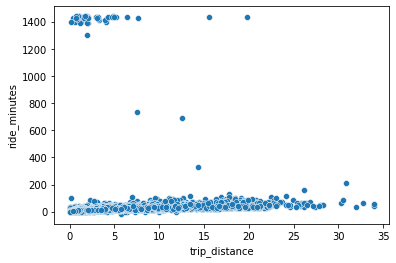

In [74]:
sns.scatterplot(x = trip_df['trip_distance'], y = trip_df['ride_minutes'])

In [75]:
trip_df['ride_minutes'].sort_values()

9358      -16.983333
19840       0.000000
7329        0.000000
15297       0.000000
17569       0.000000
            ...     
15165    1438.550000
22640    1438.650000
15000    1438.850000
15581    1439.150000
926      1439.550000
Name: ride_minutes, Length: 22667, dtype: float64

In [76]:
trip_df[trip_df['ride_minutes'] <=0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
474,Nancy Knight,2017-06-20 18:57:39,2017-06-20 18:57:39,Debit Card,1,0.0,9.50,0.0,0.0,0 days 00:00:00,0.000000
797,Jason Sanchez,2017-11-30 07:11:34,2017-11-30 07:11:34,Cash,1,0.0,8.00,0.0,0.0,0 days 00:00:00,0.000000
1207,Jessica Mcdonald,2017-01-18 17:53:45,2017-01-18 17:53:45,Cash,1,0.0,2.50,0.0,0.0,0 days 00:00:00,0.000000
2442,Holly Olson,2017-07-26 22:26:58,2017-07-26 22:26:58,Cash,1,0.0,5.50,0.0,0.0,0 days 00:00:00,0.000000
2742,Jennifer Williams,2017-05-12 12:49:56,2017-05-12 12:49:56,Credit Card,1,0.0,11.50,0.0,0.0,0 days 00:00:00,0.000000
4173,Kathleen Elliott,2017-02-16 20:37:04,2017-02-16 20:37:04,Debit Card,1,0.0,9.50,0.0,0.0,0 days 00:00:00,0.000000
4744,Ashley Fuller,2017-03-05 06:41:16,2017-03-05 06:41:16,Credit Card,1,0.0,80.84,0.0,0.0,0 days 00:00:00,0.000000
5632,Jacqueline Allison,2017-01-29 20:16:21,2017-01-29 20:16:21,Debit Card,1,0.0,39.50,0.0,0.0,0 days 00:00:00,0.000000
7329,Robert Day,2017-03-08 16:11:57,2017-03-08 16:11:57,Credit Card,1,0.0,24.00,0.0,0.0,0 days 00:00:00,0.000000
8841,Troy Cox,2017-02-08 17:54:50,2017-02-08 17:54:50,Cash,1,0.0,18.50,0.0,0.0,0 days 00:00:00,0.000000


In [79]:
trip_df= trip_df[trip_df['ride_minutes'] > 0]

In [102]:
outtime_trip_df=trip_df[trip_df['ride_minutes'] >=300]

In [103]:
outtime_trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Debit Card,1,1.36,8.5,1.47,0.0,0 days 23:50:50,1430.833333
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.0,0 days 23:59:33,1439.550000
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.0,0 days 23:50:02,1430.033333
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Credit Card,1,4.14,18.0,3.76,0.0,0 days 23:44:51,1424.850000
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.0,0 days 23:19:24,1399.400000


In [101]:
outtime_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 30 to 22640
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         46 non-null     object         
 1   tpep_pickup_datetime   46 non-null     datetime64[ns] 
 2   tpep_dropoff_datetime  46 non-null     datetime64[ns] 
 3   payment_method         46 non-null     object         
 4   passenger_count        46 non-null     int64          
 5   trip_distance          46 non-null     float64        
 6   fare_amount            46 non-null     float64        
 7   tip_amount             46 non-null     float64        
 8   tolls_amount           46 non-null     float64        
 9   ride_duration          46 non-null     timedelta64[ns]
 10  ride_minutes           46 non-null     float64        
dtypes: datetime64[ns](2), float64(5), int64(1), object(2), timedelta64[ns](1)
memory usage: 5.4+ KB


<AxesSubplot:xlabel='ride_minutes', ylabel='fare_amount'>

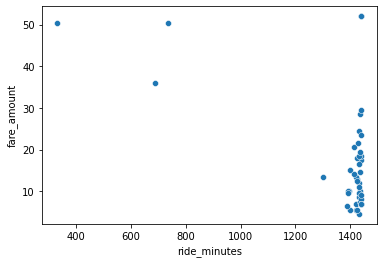

In [105]:
sns.scatterplot(x = outtime_trip_df['ride_minutes'], y = outtime_trip_df['fare_amount'])

<AxesSubplot:xlabel='ride_minutes', ylabel='fare_amount'>

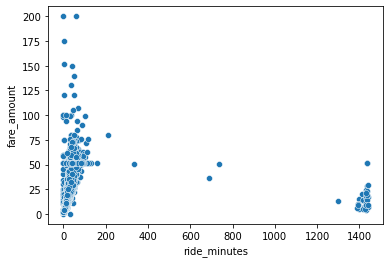

In [106]:
sns.scatterplot(x = trip_df['ride_minutes'], y = trip_df['fare_amount'])

In [107]:
trip_df = trip_df[trip_df['ride_minutes'] < 300]

<AxesSubplot:ylabel='fare_amount'>

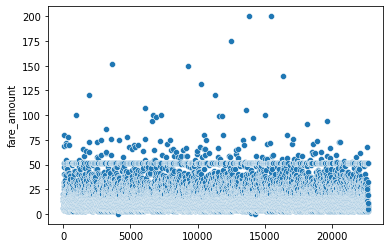

In [108]:
sns.scatterplot(x = trip_df.index, y = trip_df['fare_amount'])

In [109]:
trip_df['fare_amount'].sort_values(ascending=False) # 8478, # 마이너스

13863    200.01
15476    200.00
12513    175.00
3584     152.00
9282     150.00
          ...  
15818      2.50
14375      2.50
13972      1.00
4063       0.01
14285      0.01
Name: fare_amount, Length: 22575, dtype: float64

In [110]:
trip_df = trip_df[trip_df['fare_amount'] > 0]

In [111]:
trip_df = trip_df[trip_df['fare_amount'] < 300]

<AxesSubplot:ylabel='tip_amount'>

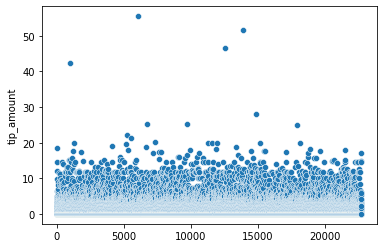

In [112]:
sns.scatterplot(x = trip_df.index, y = trip_df['tip_amount'])

In [113]:
trip_df['tip_amount'].sort_values(ascending=False)

6066     55.50
13863    51.64
12513    46.69
986      42.29
14827    28.00
         ...  
9148      0.00
9147      0.00
9145      0.00
9141      0.00
5936      0.00
Name: tip_amount, Length: 22575, dtype: float64

In [114]:
trip_df.loc[[6066,13863,12513,986]]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
6066,Tina Knight,2017-06-13 12:30:22,2017-06-13 13:37:51,Debit Card,1,32.72,107.00,55.50,16.26,0 days 01:07:29,67.483333
13863,William Yates,2017-05-19 08:20:21,2017-05-19 09:20:30,Credit Card,1,33.92,200.01,51.64,5.76,0 days 01:00:09,60.150000
12513,Mr. Wesley Reyes,2017-12-17 18:24:24,2017-12-17 18:24:42,Cash,1,0.00,175.00,46.69,11.75,0 days 00:00:18,0.300000
986,Elaine Horton,2017-08-23 18:23:26,2017-08-23 19:18:29,Cash,1,16.70,52.00,42.29,0.00,0 days 00:55:03,55.050000


In [116]:
outdis_trip_df = trip_df[trip_df['trip_distance'] == 0]

In [117]:
outdis_trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
129,Linda Kaufman,2017-06-22 08:05:33,2017-06-22 08:05:40,Debit Card,1,0.0,20.0,0.00,0.0,0 days 00:00:07,0.116667
248,Erik Perez,2017-09-18 20:50:53,2017-09-18 20:51:03,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:10,0.166667
293,Deborah Sanford,2017-10-04 19:46:24,2017-10-04 19:46:50,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:26,0.433333
321,Ryan Hughes,2017-02-22 04:01:44,2017-02-22 04:01:53,Cash,1,0.0,2.5,0.00,0.0,0 days 00:00:09,0.150000
426,David Parker,2017-01-14 07:00:26,2017-01-14 07:00:53,Cash,1,0.0,2.5,6.70,0.0,0 days 00:00:27,0.450000
...,...,...,...,...,...,...,...,...,...,...,...
22045,Kelly Perez MD,2017-07-06 10:27:11,2017-07-06 10:40:07,Cash,1,0.0,52.0,0.00,0.0,0 days 00:12:56,12.933333
22192,Angela French,2017-10-16 08:34:07,2017-10-16 08:34:10,Credit Card,1,0.0,2.5,0.00,0.0,0 days 00:00:03,0.050000
22327,Kelsey Rogers,2017-07-21 23:30:29,2017-07-21 23:31:12,Debit Card,1,0.0,16.8,3.42,0.0,0 days 00:00:43,0.716667
22385,Joseph Castillo,2017-01-07 04:48:42,2017-01-07 04:51:03,Cash,1,0.0,10.0,0.00,0.0,0 days 00:02:21,2.350000


<AxesSubplot:xlabel='ride_minutes', ylabel='fare_amount'>

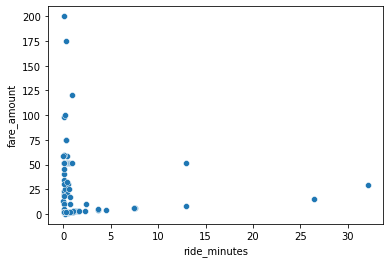

In [123]:
sns.scatterplot(x = outdis_trip_df['ride_minutes'], y = outdis_trip_df['fare_amount'])

In [128]:
outdis_trip_df[(outdis_trip_df['ride_minutes'] < 1) & (outdis_trip_df['fare_amount'] > 75)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
6880,Daniel Martinez,2017-08-17 04:06:26,2017-08-17 04:06:29,Debit Card,4,0.0,98.5,0.00,0.00,0 days 00:00:03,0.050000
7283,Phillip Vasquez,2017-01-01 03:02:53,2017-01-01 03:03:02,Credit Card,1,0.0,100.0,20.16,0.00,0 days 00:00:09,0.150000
11271,Daniel Carrillo,2017-06-19 00:51:17,2017-06-19 00:52:12,Cash,2,0.0,120.0,20.00,11.52,0 days 00:00:55,0.916667
12513,Mr. Wesley Reyes,2017-12-17 18:24:24,2017-12-17 18:24:42,Cash,1,0.0,175.0,46.69,11.75,0 days 00:00:18,0.300000
15476,James Dyer MD,2017-06-06 20:55:01,2017-06-06 20:55:06,Debit Card,1,0.0,200.0,11.00,0.00,0 days 00:00:05,0.083333


In [131]:
trip_df = trip_df[~((trip_df['ride_minutes'] < 1) & (trip_df['fare_amount'] > 75) & (trip_df['trip_distance']==0))]

In [132]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43,16.716667
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56,11.933333


In [135]:
trip_df['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [138]:
trip_df['payment_method'] = trip_df['payment_method'].replace({'Debit Card':'Card','Credit Card':'Card'})

In [139]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,ride_duration,ride_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,0 days 00:14:04,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,0 days 00:26:30,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,0 days 00:07:12,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0 days 00:30:15,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,0 days 00:16:43,16.716667
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0 days 00:03:16,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0 days 00:40:48,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,0 days 00:04:08,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,0 days 00:11:56,11.933333
